### Use Markus Drescher Code for Fourier Transform

In [ ]:
def fourier_time(t_series, dt, sigma = 0.4, nw=4, gauss = True):
    """ Calculates the FFT of a time series, applying a Gaussian window function. """

    # Gaussian or cosine window function
    n = len(t_series)
    t_list = np.arange(n)*dt

    if gauss == True:
        gauss = [np.exp(-1/2.*(i/(sigma * n))**2) for i in np.arange(n)]
        input_series = gauss * t_series
    else:
        Wfunlist = [np.cos(np.pi*t_list[t]/(2*t_list[-1]))**nw  for t in range(n)]
        input_series = Wfunlist * t_series

    # Fourier transform
    ft = np.fft.fft(input_series)
    freqs = np.fft.fftfreq(n, dt) * 2 * np.pi

    # order frequencies in increasing order
    end = np.argmin(freqs)
    freqs = np.append(freqs[end:], freqs[:end])

    # shift results accordingly
    ftShifted = np.append(ft[end:], ft[:end])

    # Take into account the additional minus sign in the time FT
    if len(ftShifted)%2 == 0:
        ftShifted = np.append(ftShifted, ftShifted[0])
        ftShifted = ftShifted[::-1]
        ftShifted = ftShifted[:-1]

    else:
        ftShifted = ftShifted[::-1]


    return freqs, ftShifted


def fourier_space(x_series):
    """ Calculates the FFT of a spatial series of values. """
    import numpy as np
    ft = np.fft.fft(x_series)
    n = len(x_series)
    momenta = 2*np.pi * np.fft.fftfreq(n, 1)

    # order momenta in increasing order
    momenta = np.fft.fftshift(momenta)

    # shift results accordingly
    Ck = np.fft.fftshift(ft)

    if n % 2 == 1:
        # extend the results to the whole Brillouin zone (right border included)
        momenta = np.append(momenta, -momenta[0])
        Ck = np.append(Ck, Ck[0])

    return momenta, Ck

## Compute F.T. of theoretical correlation function

In [ ]:
# Rearrange corrs such that position 0 corresponds to the perturbed site
# (distance 0 to perturbation)

corrs = Cs.T
#corrs is matrix T x X

xi = L//2
c_temp = np.zeros(corrs.shape, dtype=complex)
c_temp[:, :L-xi] = corrs[:, xi:]
c_temp[:, L-xi:] = corrs[:, :xi]
corrs = c_temp

print('Compute Fourier transform')
# Fourier transform in space
if L % 2 == 0:
    corrs_tk = np.zeros((corrs.shape[0], corrs.shape[1]), dtype=complex)
else:
    corrs_tk = np.zeros((corrs.shape[0], corrs.shape[1]+1), dtype=complex)
for i in np.arange(corrs.shape[0]):
    momenta, Ck = fourier_space(corrs[i,:])
    corrs_tk[i, :] = Ck
   
# Fourier transform in time
Swk = np.zeros(corrs_tk.shape, dtype=complex)
for k in np.arange(corrs_tk.shape[1]):
    freqs, Sw = fourier_time(corrs_tk[:, k], dt)
    Swk[:, k] = Sw
print('finished')

print(freqs)

Compute Fourier transform
finished
[-314.15926536 -313.54567304 -312.93208073 ...  312.31848841  312.93208073
  313.54567304]


## Compute F.T. of interpolated correlation function

In [ ]:
corrs = func_interp

c_temp = np.zeros(corrs.shape, dtype=complex)
c_temp[:, :L-xi] = corrs[:, xi:]
c_temp[:, L-xi:] = corrs[:, :xi]
corrs = c_temp

print('Compute Fourier transform')

# Fourier transform in space
if L % 2 == 0:
    corrs_tk = np.zeros((corrs.shape[0], corrs.shape[1]), dtype=complex)
else:
    corrs_tk = np.zeros((corrs.shape[0], corrs.shape[1]+1), dtype=complex)
for i in np.arange(corrs.shape[0]):
    momenta, Ck = fourier_space(corrs[i,:])
    corrs_tk[i, :] = Ck

# Fourier transform in time
interp_Swk = np.zeros(corrs_tk.shape, dtype=complex)
for k in np.arange(corrs_tk.shape[1]):
    interp_freqs, Sw = fourier_time(corrs_tk[:, k], dt)
    interp_Swk[:, k] = Sw
print('finished')


Compute Fourier transform
finished


512
[-2.85599332 -2.28479466 -1.71359599 -1.14239733 -0.57119866  0.
  0.57119866  1.14239733  1.71359599  2.28479466  2.85599332  2.85599332]


/tmp/ipykernel_1277228/775180085.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(freqs == 0)[0])


[]

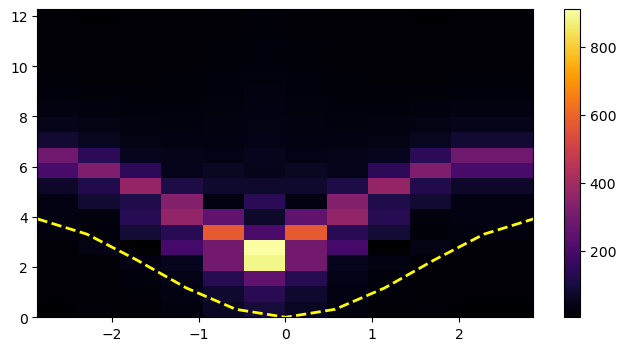

In [ ]:
plt.figure(figsize=(8, 4))
W, K = Swk.shape
interval = 20

index = int(np.where(freqs == 0)[0])
print(index)

K_min = momenta[0]
K_max = momenta[-1]
#Kmin = Kmax
# num. of momenta = K
print(momenta)


W_min = freqs[index]
W_max = freqs[index+interval]

plt.imshow(np.abs(Swk[index:(index+interval), :]), aspect = 'auto', 
           interpolation = 'none',
           origin='lower', 
           cmap='inferno',
           extent = [K_min, K_max, W_min, W_max]
           )
plt.colorbar()

omega = g - 2 * J * np.cos(momenta)  # The dispersion relation
plt.plot(momenta, omega, color='yellow', linestyle='--', linewidth=2, label=r'$\omega = j \cdot \cos(k)$')

plt.plot()

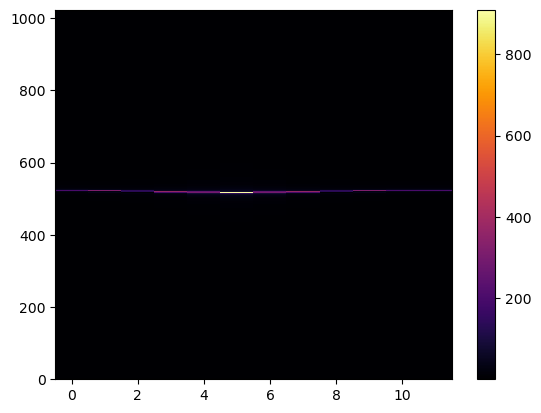

In [ ]:
plt.imshow(np.abs(interp_Swk), aspect = 'auto', 
           interpolation = 'none',
           origin='lower', 
           cmap='inferno'
           )
plt.colorbar()